In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.feature_selection import mutual_info_regression

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

In [2]:
pd.options.mode.chained_assignment = None 

train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

## Filtering column "mail_type"
trainVal_x = train_df[['ccs', 'bcced', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body']].fillna(value='0').astype('int')
test_x = test_df[['ccs', 'bcced', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body']].fillna(value='0').astype('int')

trainVal_y = train_df[['label']].astype('int')

In [3]:
trainVal_x['ccs'].value_counts()

0      67283
1       5364
2       2993
3       2016
4        826
5        524
6        411
7        206
8        130
9         80
10        58
13        57
11        48
12        36
15        25
14        23
16        19
155       19
17        12
18         7
19         7
154        4
46         4
39         4
74         4
83         3
22         3
35         2
76         2
20         1
68         1
99         1
65         1
44         1
179        1
Name: ccs, dtype: int64

In [4]:
def toNCategories(df, N):
    return pd.cut(df.values, N, labels=np.arange(N))

def to01():
    for cat in ['ccs', 'images', 'urls', 'chars_in_subject', 'chars_in_body']:
        trainVal_x /= trainVal_x.describe()[cat].values[-1]
        test_x /= trainVal_x.describe()[cat].values[-1]
        
N = 10
for cat in ['ccs', 'images', 'urls', 'chars_in_subject', 'chars_in_body']:
    print(np.array(toNCategories(trainVal_x[cat], N)))
    trainVal_x[cat] = np.array(toNCategories(trainVal_x[cat], N))
    test_x[cat] = np.array(toNCategories(test_x[cat], N))

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 1 0 ... 0 2 1]
[0 0 0 ... 0 0 0]


In [5]:
trainVal_x.head()

,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [6]:
test_x['chars_in_subject'].value_counts()

0    25228
1     7722
2     1140
3      221
4       35
5       10
8        4
6        4
9        1
Name: chars_in_subject, dtype: int64

In [7]:
test_x

,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,1,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
34360,0,0,0,0,1,1,2,0
34361,0,0,0,0,1,0,0,0
34362,0,0,0,0,1,0,0,0
34363,0,0,0,0,1,0,0,0


In [8]:
## Filtering columns
train_val_x_cat = train_df[['org', 'tld', 'mail_type']]
train_val_x_cat = train_val_x_cat.fillna(value='None')

test_x_cat = test_df[['org', 'tld', 'mail_type']]
test_x_cat = test_x_cat.fillna(value='None')

#for cat in ['org', 'tld', 'mail_type']:
#    trainVal_x.append(pd.get_dummies(train_val_x_cat[cat]))
#    test_x.append(pd.get_dummies(train_val_x_cat[cat]))

test_x_cat

,org,tld,mail_type
0,iiitd,ac.in,multipart/alternative
1,notifications,freelancer.com,multipart/alternative
2,iiitd,ac.in,multipart/alternative
3,udacity,com,multipart/alternative
4,google,com,text/html
...,...,...,...
34360,quora,com,multipart/alternative
34361,shop,sdconnect.in,multipart/alternative
34362,iiitd,ac.in,multipart/alternative
34363,tatadocomo,com,multipart/alternative


In [9]:
## Do one hot encoding of categorical feature
feat_enc = OneHotEncoder(sparse=False)
feat_enc.fit(np.vstack([train_val_x_cat, test_x_cat]))
train_val_x_featurized = pd.DataFrame(feat_enc.transform(train_val_x_cat)).astype('int')
test_x_featurized = pd.DataFrame(feat_enc.transform(test_x_cat)).astype('int')

test_x_featurized

,0,1,2,3,4,5,6,7,8,9,...,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34360,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
34361,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
34362,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
34363,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
trainVal_x = pd.concat([trainVal_x, train_val_x_featurized], axis=1)
test_x = pd.concat([test_x, test_x_featurized], axis=1)

In [11]:
test_x

,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,0,1,...,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34360,0,0,0,0,1,1,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0
34361,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
34362,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
34363,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
train_x, val_x, train_y, val_y = train_test_split(trainVal_x, trainVal_y, random_state = 0)

In [13]:
#OH_X_train.to_csv('train_modified.csv')

In [19]:
## Train a simple decision tree classifier using featurized data
#model = DecisionTreeRegressor(random_state=1)

model = KNeighborsClassifier()
#(n_neighbors=1, leaf_size=40)
#model = DecisionTreeRegressor(random_state=1)
#model = RandomForestRegressor(random_state=1)
#model = GaussianNB()
#model = AdaBoostClassifier(n_estimators=100, random_state=0)


#model = RandomForestRegressor(random_state=1)
#model = MLPClassifier( alpha=1e5, hidden_layer_sizes=(10), random_state=1, max_iter=1000)
model.fit(train_x, train_y.values[:,0])



KNeighborsClassifier(leaf_size=40, n_neighbors=1)

In [20]:
## Let's estimate our erreur with the validation set

pred_val = model.predict(val_x)
pred_val = pd.DataFrame(pred_val, columns=['label']).astype('int')



## Ratio of correct prediction over the training set:
accuracy_score(pred_val, val_y)

0.5080323288764718

In [21]:
pred_val.value_counts()

label
1        8043
0        4590
3        3645
2        2134
7        1561
6          31
4          22
5          18
dtype: int64

We only classify correctly 40% of the data, which isn't that good.
Maybe more complex models like radom forest will help us get better results.

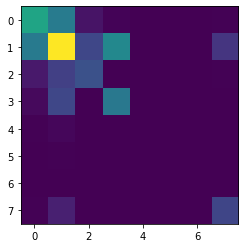

In [22]:
plt.imshow(confusion_matrix(val_y.values[:,0], pred_val.values[:,0]))

In [ ]:
## I re-train the model with the entire available data.
model.fit(trainVal_x, trainVal_y.values[:,0])


## Make predictions
pred_y = model.predict(test_x)


## Save results to submission file
pred_df = pd.DataFrame(pred_y, columns=['label']).astype('int')
pred_df.to_csv("DT_sample_submission.csv", index=True, index_label='Id')